# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [ ]:
# @@@ 1

unique_years = df['YEAR'].nunique()
print(f"There are {unique_years} years of data logged.")

There are 33 years of data logged.


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [ ]:
# @@@ 2

mi_avg = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].mean()
oh_avg = df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].mean()

print(f"Michigan's average: {mi_avg}")
print(f"Ohio's average: {oh_avg}")

if mi_avg > oh_avg:
    print("Michigan has a higher average math score than Ohio.")
elif oh_avg > mi_avg:
    print("Ohio has a higher average math score than Michigan")
else:
    print("Both states have the same average math score.")   

Michigan's average: 276.1666666666667
Ohio's average: 282.25
Ohio has a higher average math score than Michigan


Find the average for your chosen test across all states in 2019

In [ ]:
# @@@ 3

data_2019 = df[df['YEAR'] == 2019]
average_2019 = data_2019['AVG_MATH_8_SCORE'].mean()
print(f"The average score across all states in 2019 was: {average_2019}")


The average score across all states in 2019 was: 281.2641509433962


For each state, find a maximum value for your chosen test score

In [ ]:
# @@@ 4

# Find the highest score recorded in the Grade 8 Math column
state_max_scores = df.groupby('STATE')['AVG_MATH_8_SCORE'].max()

state_max_scores_sorted = state_max_scores.sort_values(ascending=False)

print(f"The maximum recorded Grade 8 Math score for each state is: {state_max_scores_sorted}")

The maximum recorded Grade 8 Math score for each state is: STATE
MASSACHUSETTS           301.0
NEW_JERSEY              296.0
NEW_HAMPSHIRE           296.0
VERMONT                 295.0
MINNESOTA               295.0
NORTH_DAKOTA            293.0
DODEA                   293.0
MONTANA                 293.0
COLORADO                292.0
SOUTH_DAKOTA            291.0
TEXAS                   290.0
WASHINGTON              290.0
VIRGINIA                290.0
KANSAS                  290.0
PENNSYLVANIA            290.0
OHIO                    290.0
WYOMING                 289.0
CONNECTICUT             289.0
WISCONSIN               289.0
MAINE                   289.0
MARYLAND                288.0
NEBRASKA                288.0
INDIANA                 288.0
UTAH                    287.0
IDAHO                   287.0
NORTH_CAROLINA          286.0
MISSOURI                286.0
IOWA                    286.0
NATIONAL                285.0
ILLINOIS                285.0
OREGON                  285.0
DELAW

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
# @@@ 5

df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['enrollment']

df_clean = df.dropna(subset=['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', 'score'])

relationship_result = df_clean['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'].corr(df_clean['score'])

print(f"Feature Created: SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT")
print(f"The statistical relationship to Grade 8 Math scores is: {round(relationship_result, 2)}")

Feature Created: SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT
The statistical relationship to Grade 8 Math scores is: 0.17


# @@@ 7

Feature engineering justification: **<I created a 'spend_per_student' column related to how state expenditures per student affect their grade 8 test scores in order to connect one of the most historically used variables to educational impact  \>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average Math Score')

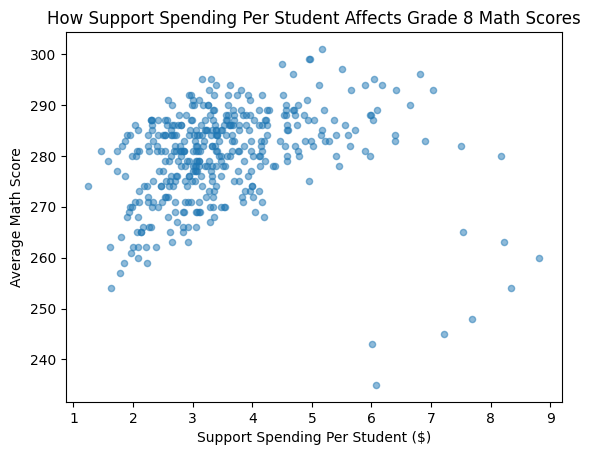

In [ ]:
# @@@ 6

import matplotlib.pyplot as plt

df_clean.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='score', alpha=0.5)

plt.title('How Support Spending Per Student Affects Grade 8 Math Scores')
plt.xlabel('Support Spending Per Student ($)')
plt.ylabel('Average Math Score')

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0, 0.5, 'Number of Records (Frequency)')

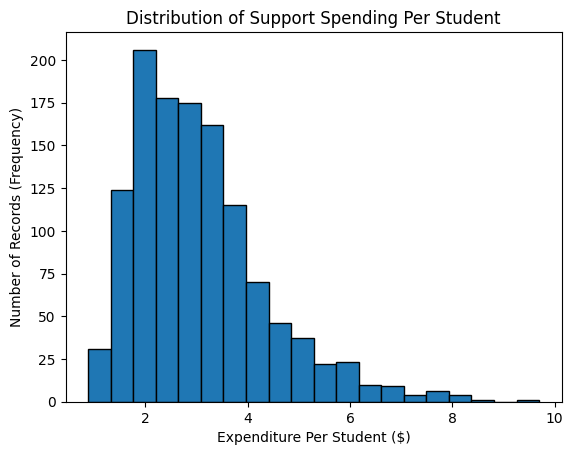

In [ ]:
# @@@ 7

df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'].plot.hist(title="Distribution of Support Spending Per Student", edgecolor="black", bins=20)

plt.xlabel('Expenditure Per Student ($)')
plt.ylabel('Number of Records (Frequency)')

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [45]:
# @@@ 8

X = df_clean[['enrollment', 'spending', 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']].values
y = df_clean['score'].values

In [47]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [57]:
# @@@ 10
from sklearn.linear_model import LinearRegression

In [58]:
# @@@ 11
model = LinearRegression()

In [59]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [61]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [62]:
# @@@ 12

from sklearn.metrics import mean_absolute_error, r2_score

# 1. Calculate the average point error
mae = mean_absolute_error(y_test, y_pred)

# 2. Calculate the R-squared accuracy (1.0 is perfect)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {round(mae, 2)}")
print(f"R-squared Score: {round(r2, 2)}")

Mean Absolute Error: 6.08
R-squared Score: 0.1


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Testing')

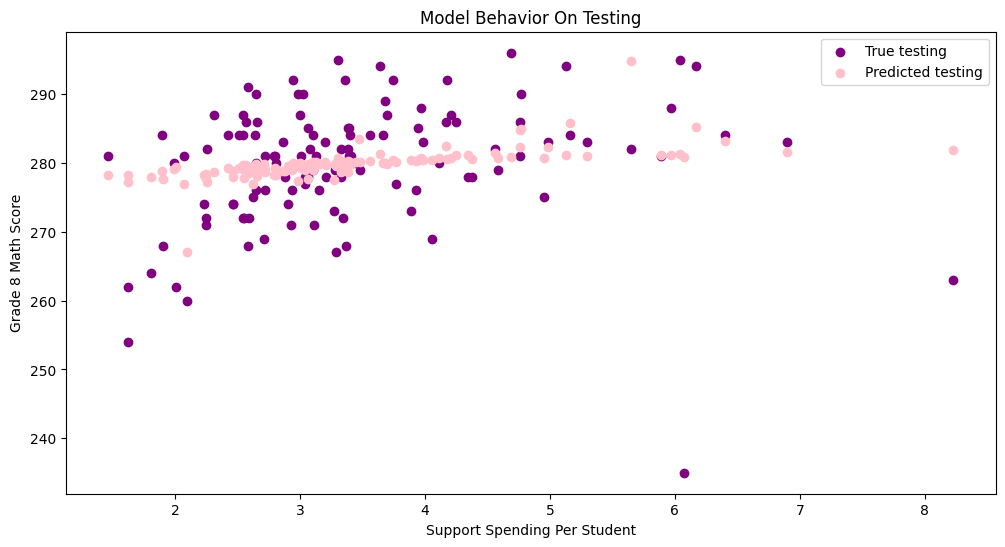

In [70]:
# @@@ 13
col_name = 2
f = plt.figure(figsize=(12,6))

plt.scatter(X_test[:, col_name], y_test, color = "purple")
plt.scatter(X_test[:, col_name], y_pred, color = "pink")

plt.legend(['True testing','Predicted testing'])
plt.xlabel('Support Spending Per Student')
plt.ylabel('Grade 8 Math Score')
plt.title("Model Behavior On Testing")


Text(0.5, 1.0, 'Model Behavior On Testing')

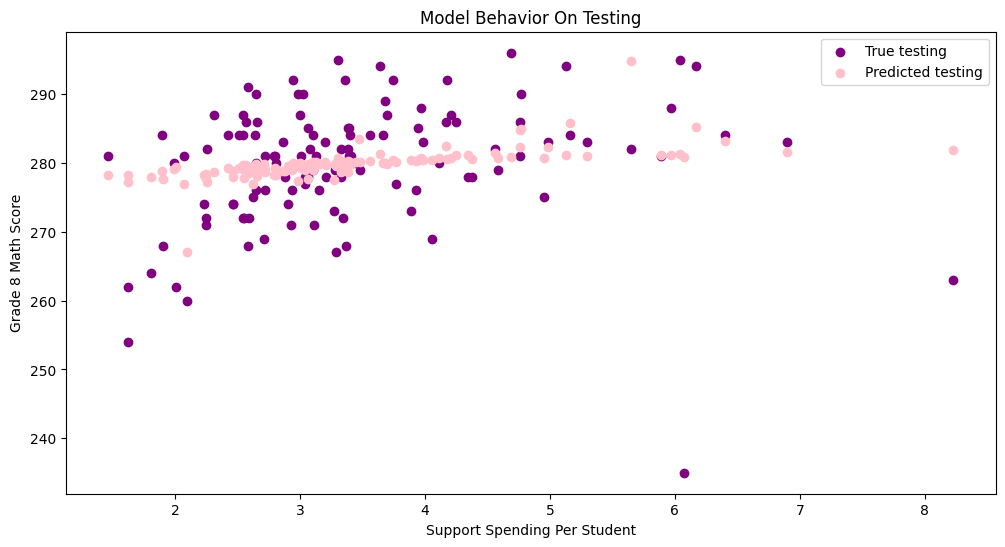

In [71]:
# @@@ 14

col_name = 2
f = plt.figure(figsize=(12,6))

plt.scatter(X_test[:, col_name], y_test, color = "purple")
plt.scatter(X_test[:, col_name], y_pred, color = "pink")

plt.legend(['True testing','Predicted testing'])
plt.xlabel('Support Spending Per Student')
plt.ylabel('Grade 8 Math Score')
plt.title("Model Behavior On Testing")